In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab

In [2]:


def choose_action(eps,n_arms, Q):
    armIndex = 0
    randomE = np.random.random()
    if (randomE < eps):
        armIndex = np.random.randint(0,n_arms)
    else:
        armIndex= np.argmax(Q) 
    return armIndex
def upperconfidencebound_choose_action(Q_ucb):
    armIndex = 0
    idx = [i for i, arr in enumerate(Q_ucb) if not np.isfinite(arr).all()]
    if len(idx) > 0:
        t = np.random.randint(0,(len(idx)))
        armIndex = idx[t]
    else:
        armIndex= np.argmax(Q_ucb) 
    return armIndex
def get_reward( action, q):
    mu = q[action]
    reward = np.random.normal(mu,1,1)
    return reward
def update_Q_incrementallyComputed(action, reward,k,Q):
    k[action] += 1
    Q[action] += (1./k[action]) * (reward - Q[action])
def update_Q_constantStepSize(action, reward, Q):
    alpha = 0.1
    Q[action] += alpha * (reward - Q[action])
def update_q(q, n_arms):  
    q = q + np.random.normal(0,0.01,n_arms)

In [3]:

# UCB for c=4, c=2, e-greedy = 0.1, Q=5, e=0 ; incrementally computed ; stationary


n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1


m=0
reward_avg = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 4
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_incrementallyComputed(action, reward,k,Q)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage = (optimal_action/np.float(N_experiments))*100

#UCB for c=2


n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1


m=0
reward_avg1 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 2
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_incrementallyComputed(action, reward,k,Q)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg1 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg1 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage1 = (optimal_action/np.float(N_experiments))*100
    
    
#Q=5, e=0

n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0


m=1
reward_avg2 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.full((n_arms),5)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 4
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_incrementallyComputed(action, reward,k,Q)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg2 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg2 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage2 = (optimal_action/np.float(N_experiments))*100


    
    
n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1    
m=1
reward_avg3 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 4
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_incrementallyComputed(action, reward,k,Q)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg3 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg3 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage3 = (optimal_action/np.float(N_experiments))*100


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide


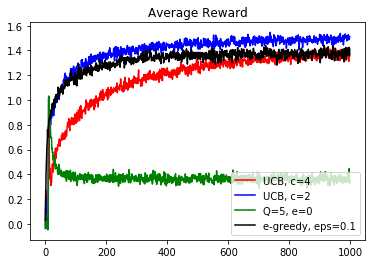

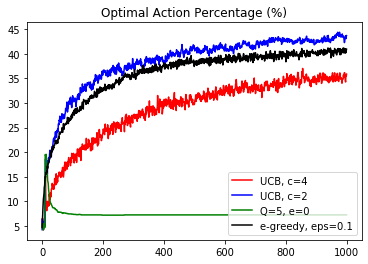

In [4]:

pylab.plot(range(0,N_timeSteps),reward_avg,'-r',label='UCB, c=4')
pylab.plot(range(0,N_timeSteps),reward_avg1,'-b',label='UCB, c=2')
pylab.plot(range(0,N_timeSteps),reward_avg2,'-g',label='Q=5, e=0')
pylab.plot(range(0,N_timeSteps),reward_avg3,'-k',label='e-greedy, eps=0.1')
pylab.legend(loc='lower right')
pylab.title("Average Reward")
pylab.show()
pylab.figure()
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage,'-r',label='UCB, c=4')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage1,'-b',label='UCB, c=2')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage2,'-g',label='Q=5, e=0')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage3,'-k',label='e-greedy, eps=0.1')
pylab.legend(loc='lower right')
pylab.title("Optimal Action Percentage (%)")
pylab.show()

In [5]:
# UCB for c=4, c=2, e-greedy = 0.1, Q=5, e=0 ; incrementally computed ; non-stationary


n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1


m=0
reward_avg = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 4
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_incrementallyComputed(action, reward, k, Q)
        update_q(q, n_arms)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage = (optimal_action/np.float(N_experiments))*100

#UCB for c=2


n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1


m=0
reward_avg1 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 2
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_incrementallyComputed(action, reward, k, Q)
        update_q(q, n_arms)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg1 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg1 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage1 = (optimal_action/np.float(N_experiments))*100
    
    
#Q=5, e=0

n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0


m=1
reward_avg2 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.full((n_arms),5)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 4
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_incrementallyComputed(action, reward, k, Q)
        update_q(q, n_arms)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg2 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg2 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage2 = (optimal_action/np.float(N_experiments))*100


    
    
n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1    
m=1
reward_avg3 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_incrementallyComputed(action, reward, k, Q)
        update_q(q, n_arms)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg3 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg3 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage3 = (optimal_action/np.float(N_experiments))*100


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide


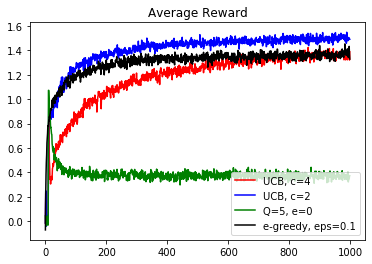

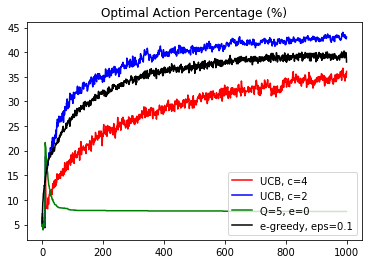

In [6]:
pylab.plot(range(0,N_timeSteps),reward_avg,'-r',label='UCB, c=4')
pylab.plot(range(0,N_timeSteps),reward_avg1,'-b',label='UCB, c=2')
pylab.plot(range(0,N_timeSteps),reward_avg2,'-g',label='Q=5, e=0')
pylab.plot(range(0,N_timeSteps),reward_avg3,'-k',label='e-greedy, eps=0.1')
pylab.legend(loc='lower right')
pylab.title("Average Reward")
pylab.show()
pylab.figure()
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage,'-r',label='UCB, c=4')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage1,'-b',label='UCB, c=2')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage2,'-g',label='Q=5, e=0')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage3,'-k',label='e-greedy, eps=0.1')
pylab.legend(loc='lower right')
pylab.title("Optimal Action Percentage (%)")
pylab.show()

In [8]:
# UCB for c=4, c=2, e-greedy = 0.1, Q=5, e=0 ; constant_step-size ; stationary


n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1


m=0
reward_avg = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 4
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_constantStepSize(action, reward,Q)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage = (optimal_action/np.float(N_experiments))*100

#UCB for c=2


n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1


m=0
reward_avg1 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 2
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_constantStepSize(action, reward,Q)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg1 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg1 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage1 = (optimal_action/np.float(N_experiments))*100
    
    
#Q=5, e=0

n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0


m=1
reward_avg2 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.full((n_arms),5)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 4
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_constantStepSize(action, reward, Q)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg2 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg2 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage2 = (optimal_action/np.float(N_experiments))*100


    
    
n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1    
m=1
reward_avg3 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 4
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_constantStepSize(action, reward,Q)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg3 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg3 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage3 = (optimal_action/np.float(N_experiments))*100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide


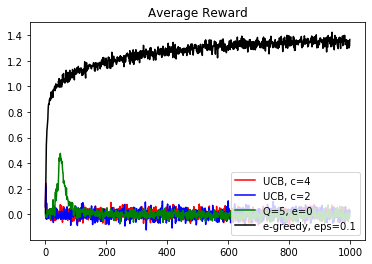

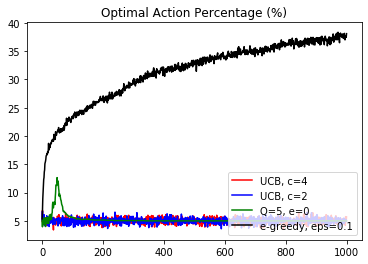

In [9]:
pylab.plot(range(0,N_timeSteps),reward_avg,'-r',label='UCB, c=4')
pylab.plot(range(0,N_timeSteps),reward_avg1,'-b',label='UCB, c=2')
pylab.plot(range(0,N_timeSteps),reward_avg2,'-g',label='Q=5, e=0')
pylab.plot(range(0,N_timeSteps),reward_avg3,'-k',label='e-greedy, eps=0.1')
pylab.legend(loc='lower right')
pylab.title("Average Reward")
pylab.show()
pylab.figure()
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage,'-r',label='UCB, c=4')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage1,'-b',label='UCB, c=2')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage2,'-g',label='Q=5, e=0')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage3,'-k',label='e-greedy, eps=0.1')
pylab.legend(loc='lower right')
pylab.title("Optimal Action Percentage (%)")
pylab.show()

In [10]:
# UCB for c=4, c=2, e-greedy = 0.1, Q=5, e=0 ; constant_step-size; non-stationary


n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1


m=0
reward_avg = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 4
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_constantStepSize(action, reward,Q)
        update_q(q, n_arms)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage = (optimal_action/np.float(N_experiments))*100

#UCB for c=2


n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1


m=0
reward_avg1 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 2
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_constantStepSize(action, reward,Q)
        update_q(q, n_arms)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg1 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg1 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage1 = (optimal_action/np.float(N_experiments))*100
    
    
#Q=5, e=0

n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0


m=1
reward_avg2 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.full((n_arms),5)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        c = 4
        if m == 0:
            Q_ucb = Q + c*np.sqrt((np.divide(np.log(ts),k)))
            if ts >1:
                action = upperconfidencebound_choose_action(Q_ucb)
            else:
                action = choose_action(eps,n_arms,Q)
        else:
            action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_constantStepSize(action, reward,Q)
        update_q(q, n_arms)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg2 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg2 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage2 = (optimal_action/np.float(N_experiments))*100


    
    
n_arms = 10
#q= np.random.normal(0,1,n_arms)
N_experiments = 2000
N_timeSteps   = 1000
eps = 0.1    
m=1
reward_avg3 = np.zeros((N_timeSteps,1)) 
action_sum = np.zeros((N_timeSteps, n_arms))
optimal_action = np.zeros((N_timeSteps,1))
optimal_actionSum = np.zeros((N_timeSteps,1))
optimal_actionIndex = np.zeros((N_experiments,1))
action_record = np.zeros((N_experiments,N_timeSteps))
for i in range(N_experiments):
    #q= np.ones(n_arms,dtype = float)
    q= np.random.normal(0,1,n_arms)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype = float)
    action_history = []
    reward_history = []
    for ts in range(N_timeSteps):
        action = choose_action(eps,n_arms,Q)
        reward = get_reward(action, q)
        update_Q_constantStepSize(action, reward,Q)
        update_q(q, n_arms)
        action_history.append(action)
        reward_history.append(reward)
    (action_history, reward_history) = (np.array(action_history), np.array(reward_history))
    reward_avg3 += reward_history
    action_record[i,:] = action_history 
    optimal_actionIndex[i] = np.argmax(q)
reward_avg3 /= np.float(N_experiments)
for i in range(N_timeSteps):
    x = action_record[:,i] 
    count = 0
    for j in range(N_timeSteps):
        if (x[j]==optimal_actionIndex[j]):
            count = count+1
    optimal_action[i] = count
    optimal_actionPercentage3 = (optimal_action/np.float(N_experiments))*100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in sqrt
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide


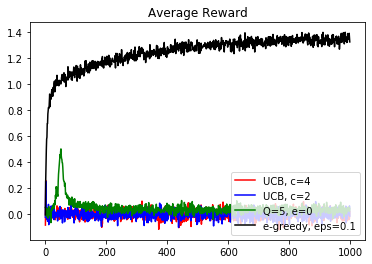

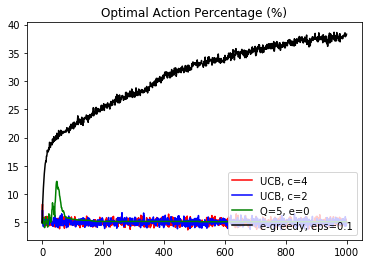

In [11]:
pylab.plot(range(0,N_timeSteps),reward_avg,'-r',label='UCB, c=4')
pylab.plot(range(0,N_timeSteps),reward_avg1,'-b',label='UCB, c=2')
pylab.plot(range(0,N_timeSteps),reward_avg2,'-g',label='Q=5, e=0')
pylab.plot(range(0,N_timeSteps),reward_avg3,'-k',label='e-greedy, eps=0.1')
pylab.legend(loc='lower right')
pylab.title("Average Reward")
pylab.show()
pylab.figure()
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage,'-r',label='UCB, c=4')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage1,'-b',label='UCB, c=2')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage2,'-g',label='Q=5, e=0')
pylab.plot(range(0,N_timeSteps),optimal_actionPercentage3,'-k',label='e-greedy, eps=0.1')
pylab.legend(loc='lower right')
pylab.title("Optimal Action Percentage (%)")
pylab.show()